In [8]:
import numpy as np
import pandas as pd 
import statsmodels 
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('train.csv')

In [10]:
data.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159


In [11]:
data.tail()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd
8897,2011-10-02,DTW,ATL,9.263158,10.427055,7.316967
8898,2012-09-25,DFW,ORD,12.772727,12.201552,10.641034
8899,2012-01-19,SFO,LAS,11.047619,10.508746,7.908705
8900,2013-02-03,ORD,PHL,6.076923,10.174042,4.030334
8901,2011-11-26,DTW,ATL,9.526316,9.202674,6.167733


- the date of departure
- the departure airport
- the arrival airport
- the mean and standard deviation of the number of weeks of the reservations made before the departure date
- a field called log_PAX which is related to the number of passengers (the actual number were changed for privacy reasons)

In [12]:
#stats descriptives
data.describe()

,WeeksToDeparture,log_PAX,std_wtd
count,8902.000000,8902.000000,8902.000000
mean,11.446469,10.999048,8.617773
std,2.787140,0.993945,2.139604
min,2.625000,3.878108,2.160247
25%,9.523810,10.427055,7.089538
50%,11.300000,11.013357,8.571116
75%,13.240000,11.592888,10.140521
max,23.163265,14.007791,15.862216


In [13]:
#check null values
data.isnull().sum().sort_values(ascending = False)

std_wtd             0
log_PAX             0
WeeksToDeparture    0
Arrival             0
Departure           0
DateOfDeparture     0
dtype: int64

In [14]:
data.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159


In [15]:
#change l'index
data.index = data["DateOfDeparture"]

In [16]:
data.head()
data = data.sort_values('DateOfDeparture')

/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'DateOfDeparture' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


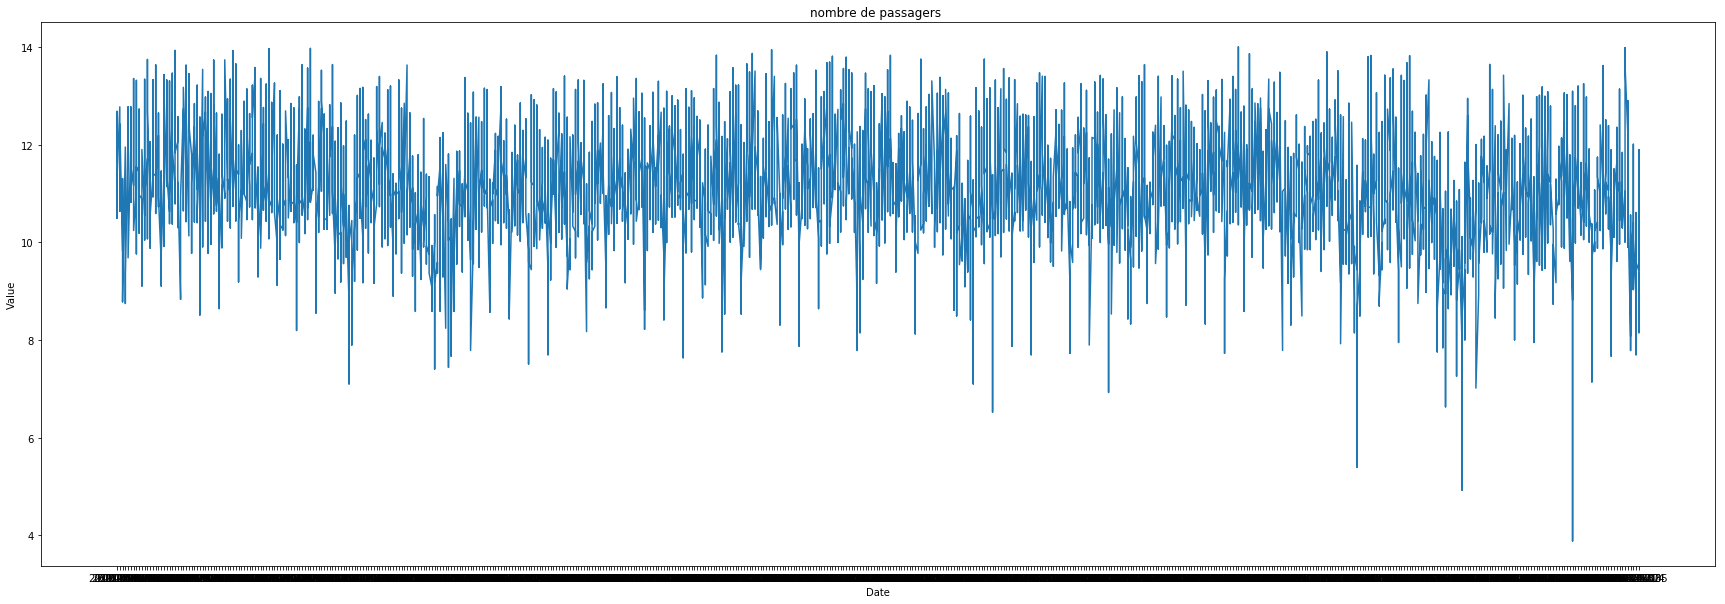

In [18]:
#plot 
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(30,10))
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x = data.index, y = data.log_PAX, title= "nombre de passagers ")

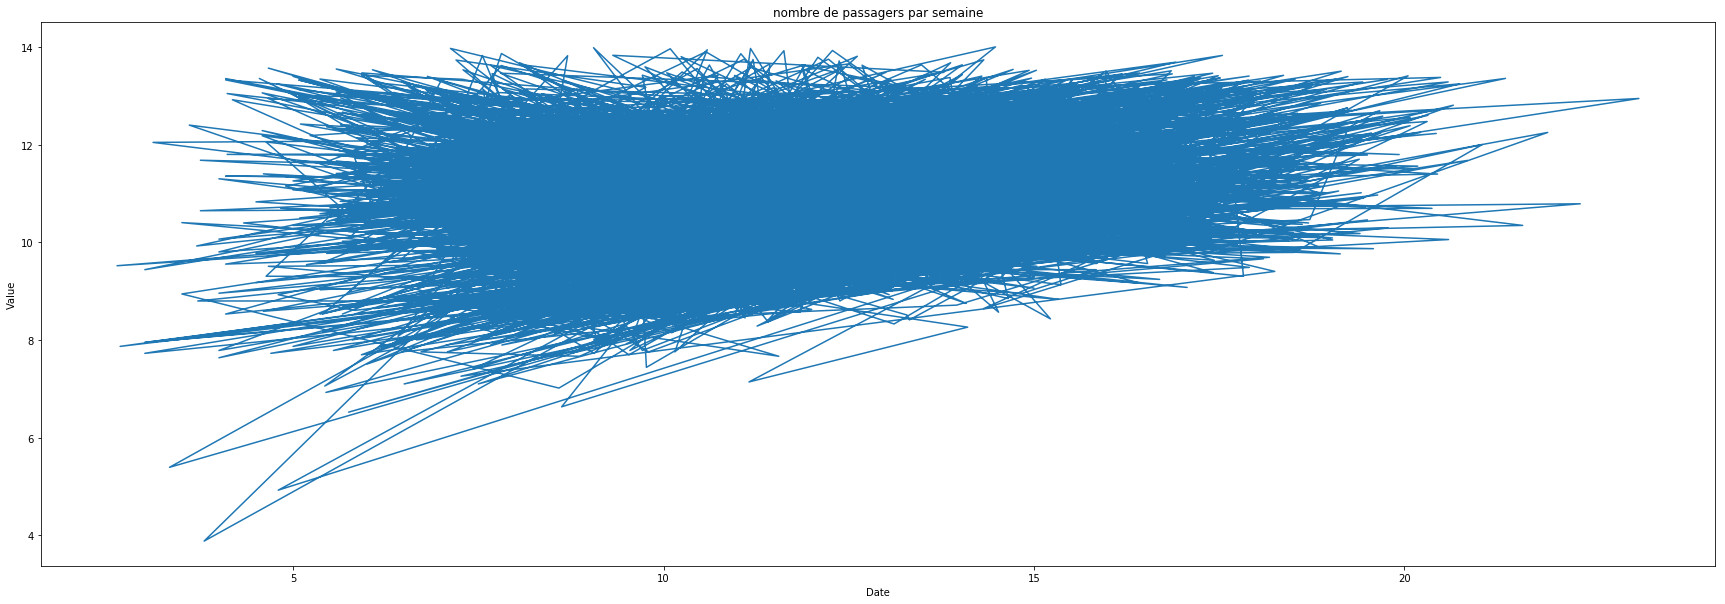

In [19]:
plot_df(data, x = data.WeeksToDeparture, y = data.log_PAX, title= "nombre de passagers par semaine")

In [21]:
#features engineering : trouver de l'information dans les dates et le temps qui passe
#transformer en datetimes
data_trans = data
data_trans.head()
data_trans.head()

data_trans["DateOfDeparture"] = pd.to_datetime(data_trans['DateOfDeparture'])
data_trans['year']= data_trans['DateOfDeparture'].dt.year 
data_trans['month']= data_trans['DateOfDeparture'].dt.month 
data_trans['day']= data_trans['DateOfDeparture'].dt.day
data_trans['dayofweek_num']= data_trans['DateOfDeparture'].dt.dayofweek



data_trans.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,year,month,day,dayofweek_num
DateOfDeparture,,,,,,,,,,
2011-09-01,2011-09-01,SFO,SEA,12.200000,11.641595,7.648529,2011,9,1,3
2011-09-01,2011-09-01,DFW,ATL,12.250000,12.686301,8.103944,2011,9,1,3
2011-09-01,2011-09-01,MSP,DEN,11.260870,11.033573,8.427322,2011,9,1,3
2011-09-01,2011-09-01,MIA,ATL,11.181818,11.063493,7.417074,2011,9,1,3
2011-09-01,2011-09-01,LGA,DFW,9.736842,11.187871,6.942959,2011,9,1,3


In [51]:
#group par trajet 
data_trans['trip']= data_trans["Departure"] + "_" + data_trans["Arrival"]
data_trans2 = data_trans.groupby(['trip','dayofweek_num']).count()
#data_trans.groupby([("trip","dayofweek_num")]
data_trans2.head(100)

#nouveau tableau
data_trans3 = data_trans.groupby(["trip","dayofweek_num","month"])["log_PAX"].count()
data_trans3.head(100)


trip     dayofweek_num
ATL_BOS  0                16
         1                11
         2                 7
         3                 5
         4                15
         5                18
         6                15
ATL_CLT  0                18
         1                15
         2                 8
         3                16
         4                 6
         5                 8
         6                 9
ATL_DEN  0                 8
         1                 9
         2                 6
         3                 6
         4                 7
         5                16
         6                 8
ATL_DFW  0                 7
         1                10
         2                 9
         3                 7
         4                13
         5                 6
         6                 8
ATL_DTW  0                11
         1                 8
                          ..
ATL_MSP  0                13
         1                 9
         2          

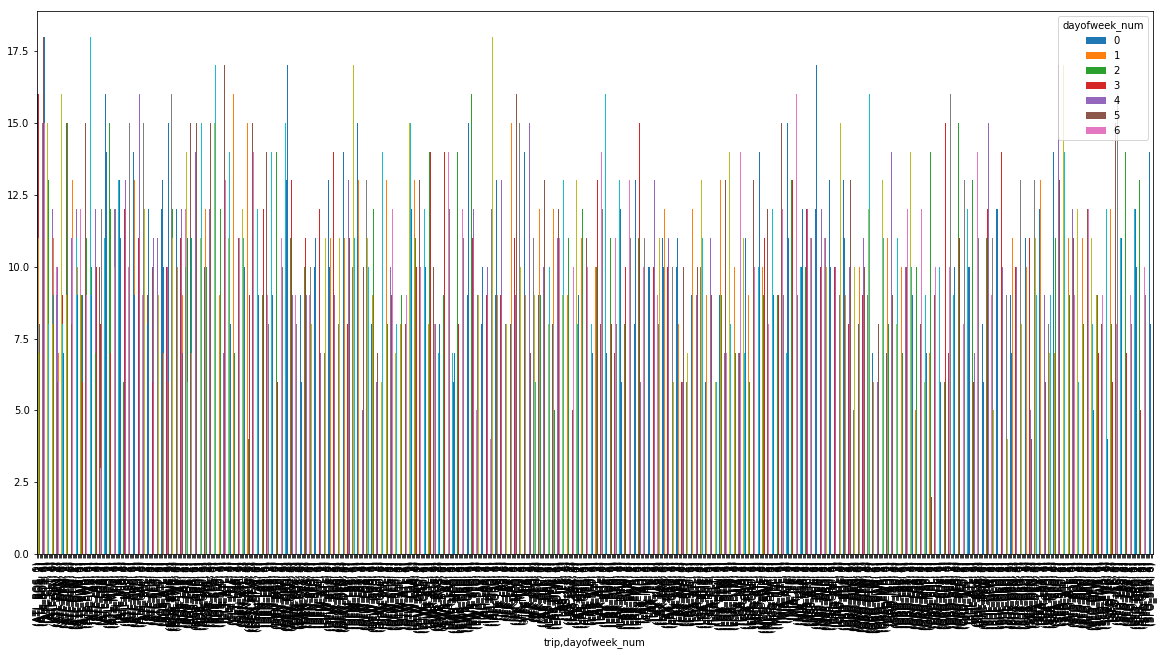

In [53]:
#visualisation
data_trans3.unstack().plot(kind = 'bar')
data_trans3.plot(kind = 'bar',figsize = (20,10))

In [67]:
df_atl = data_trans[data_trans["Departure"]== "ATL"]
df_atl= df_atl.groupby(['trip','dayofweek_num'])["log_PAX"].count()

df_atl.head(50)


trip     dayofweek_num
ATL_BOS  0                16
         1                11
         2                 7
         3                 5
         4                15
         5                18
         6                15
ATL_CLT  0                18
         1                15
         2                 8
         3                16
         4                 6
         5                 8
         6                 9
ATL_DEN  0                 8
         1                 9
         2                 6
         3                 6
         4                 7
         5                16
         6                 8
ATL_DFW  0                 7
         1                10
         2                 9
         3                 7
         4                13
         5                 6
         6                 8
ATL_DTW  0                11
         1                 8
         2                 9
         3                11
         4                 9
         5          

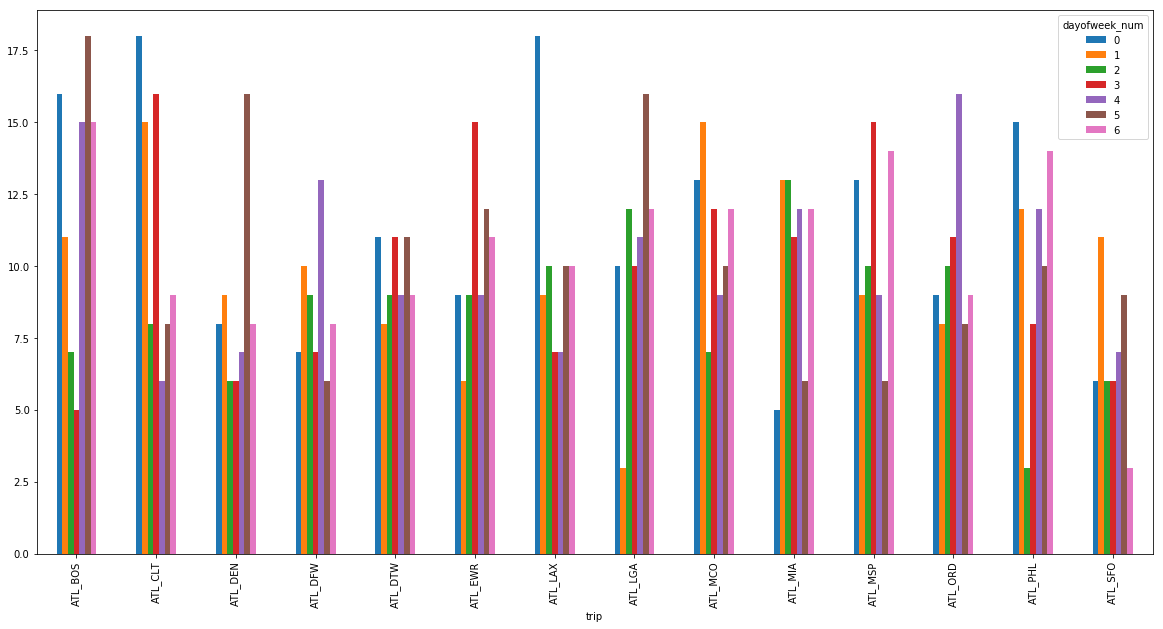

In [70]:
#visualisation unstack 
df_atl.unstack().plot(kind = 'bar',figsize = (20,10))

In [ ]:
len(data_trans)

In [ ]:
#tester la stationarité
#test de dickeyfuller
from statsmodels.tsa.stattools import adfuller
X = data.log_PAX
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
#tracer les autocorrelations
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(X, lags= 50)
pyplot.show()

In [ ]:
#autocorellations partielles
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(X, lags=50)
pyplot.show()